In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
df_train = pd.read_csv("Training.csv")
df_test = pd.read_csv("Testing.csv")

In [3]:
df_train.drop('Unnamed: 133', axis=1, inplace=True)


In [4]:
df_train['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

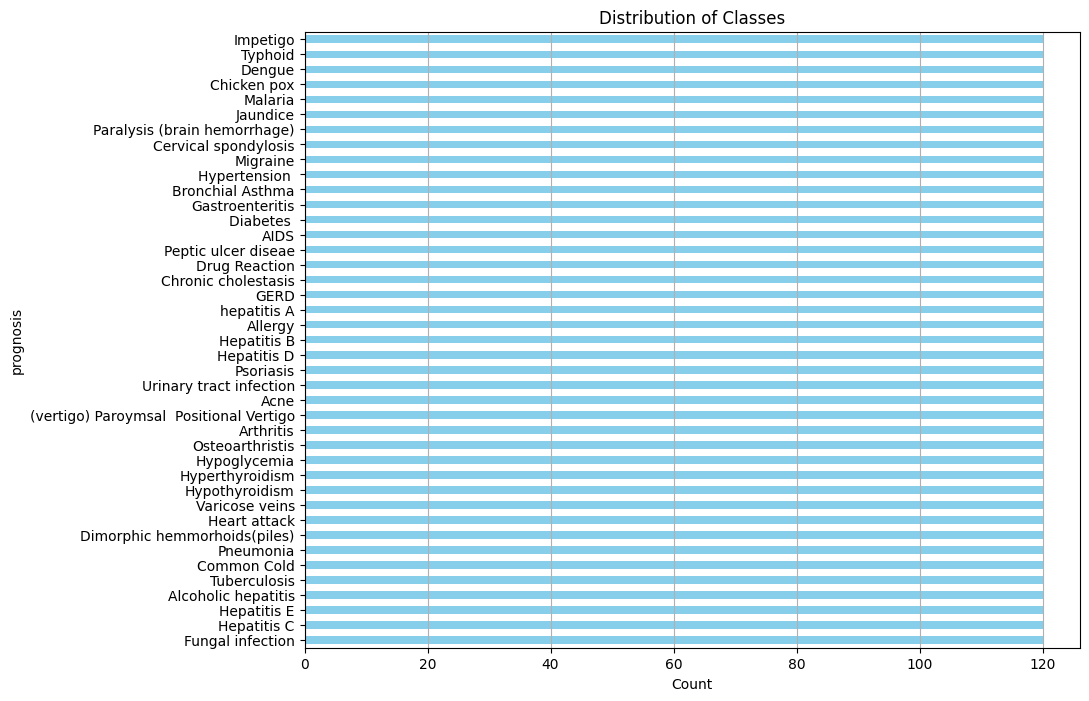

In [5]:
class_counts = df_train['prognosis'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 8))
class_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.grid(axis='x')
plt.show()

In [6]:
encoder = LabelEncoder()
df_train["diagnosis"] = encoder.fit_transform(df_train["prognosis"])

In [7]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=666),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

In [8]:
y = df_train['diagnosis']
X = df_train.drop(['diagnosis', 'prognosis'], axis=1)

In [9]:
def train_models_and_evaluate(X, y, models):
    # Split the data into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize a list to store results
    results_list = []

    for model_name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict on both training and validation sets
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)

        # Calculate accuracy scores
        train_accuracy = accuracy_score(y_train, y_train_pred)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)

        # Save the results in the list
        results_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': valid_accuracy
        })

    # Create a DataFrame from the list of results
    results_df = pd.DataFrame(results_list)
    
    return results_df

In [10]:
%%time
results_df = train_models_and_evaluate(X, y, classification_models)

CPU times: total: 2min 3s
Wall time: 2min 21s


In [11]:
results_df

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,1.0,1.0
1,Decision Tree,1.0,1.0
2,Random Forest,1.0,1.0
3,Gradient Boosting,1.0,1.0
4,SVM,1.0,1.0
5,K-Nearest Neighbors,1.0,1.0
6,Naive Bayes,1.0,1.0
7,Neural Network,1.0,1.0


In [12]:
encoder = LabelEncoder()
df_test["diagnosis"] = encoder.fit_transform(df_test["prognosis"])

In [13]:
y_test = df_test['diagnosis']
X_test = df_test.drop(['diagnosis', 'prognosis'], axis=1)

In [14]:
model = LogisticRegression()
model.fit(X, y) # fitting on the whole train data
y_test_preds = model.predict(X_test)

In [15]:
acc_score = accuracy_score(y_test, y_test_preds)
print(f"The Accuracy for Test Data is: {acc_score * 100}%.")

The Accuracy for Test Data is: 100.0%.
